# KNN



In [1]:
import pandas as pd
df = pd.read_excel('pokemon_knn.xlsx')
df

,中文名称,主分类,对阵虫系,对阵恶系,对阵龙系,对阵电系,对阵妖精系,对阵格斗系,对阵火系,对阵飞行系,...,对阵钢系,对阵水系,攻击,防御,身高,生命值,特殊攻击,特殊防御,速度,体重
0,妙蛙种子,草系,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1.0,0.5,49,49,0.7,45,65,65,45,6.9
1,妙蛙草,草系,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1.0,0.5,62,63,1.0,60,80,80,60,13.0
2,妙蛙花,草系,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1.0,0.5,100,123,2.0,80,122,120,80,100.0
3,小火龙,火系,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,0.5,2.0,52,43,0.6,39,60,50,65,8.5
4,火恐龙,火系,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,0.5,2.0,64,58,1.1,58,80,65,80,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,磨牙彩皮鱼,水系,2.0,2.0,1.0,2.0,1.0,0.5,0.5,1.0,...,0.5,0.5,105,70,0.9,68,70,70,92,19.0
699,老翁龙,一般系,1.0,1.0,2.0,0.5,2.0,2.0,0.5,1.0,...,1.0,0.5,60,85,3.0,78,135,91,36,185.0
700,心鳞宝,龙系,1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,...,1.0,0.5,55,65,0.6,45,45,45,45,29.7
701,鳞甲龙,龙系,0.5,0.5,2.0,0.5,4.0,1.0,0.5,2.0,...,1.0,0.5,75,90,1.2,55,65,70,65,47.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   中文名称    703 non-null    object 
 1   主分类     703 non-null    object 
 2   对阵虫系    703 non-null    float64
 3   对阵恶系    703 non-null    float64
 4   对阵龙系    703 non-null    float64
 5   对阵电系    703 non-null    float64
 6   对阵妖精系   703 non-null    float64
 7   对阵格斗系   703 non-null    float64
 8   对阵火系    703 non-null    float64
 9   对阵飞行系   703 non-null    float64
 10  对阵幽灵系   703 non-null    float64
 11  对阵草系    703 non-null    float64
 12  对阵地上系   703 non-null    float64
 13  对阵冰系    703 non-null    float64
 14  对阵一般系   703 non-null    float64
 15  对阵毒系    703 non-null    float64
 16  对阵超能力系  703 non-null    float64
 17  对阵岩石系   703 non-null    float64
 18  对阵钢系    703 non-null    float64
 19  对阵水系    703 non-null    float64
 20  攻击      703 non-null    int64  
 21  防御      703 non-null    int64  
 22  身高

In [3]:
df_unknown = pd.read_excel('pokemon_knn.xlsx',sheet_name=1)
df_unknown

,中文名称,主分类,对阵虫系,对阵恶系,对阵龙系,对阵电系,对阵妖精系,对阵格斗系,对阵火系,对阵飞行系,...,对阵钢系,对阵水系,攻击,防御,身高,生命值,特殊攻击,特殊防御,速度,体重
0,未知,未知,1,1,1,0.5,1.25,0.75,2,2,...,1,0.5,未知,未知,未知,未知,未知,未知,未知,未知


knn算法逻辑，计算已知与未知的距离。欧式距离算法

In [4]:
r = df_unknown.iloc[0,:]
x = df.iloc[0,:]

In [5]:
[(r[i]-x[i])**2 for i in range(2,20)]

[0.0,
 0.0,
 0.0,
 0.0,
 0.5625,
 0.0625,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0625,
 0.0,
 0.0]

In [6]:
import numpy as np

np.sqrt(sum([(r[i]-x[i])**2 for i in range(2,20)]))

1.6393596310755

In [7]:
all_dst = df.apply(lambda x: np.sqrt(sum([(r[i]-x[i])**2 for i in range(2,20)])),axis=1)
all_dst

0      1.639360
1      1.639360
2      1.639360
3      3.708099
4      3.708099
         ...   
698    3.937004
699    2.915476
700    2.449490
701    3.741657
702    3.741657
Length: 703, dtype: float64

In [8]:
all_dst.sort_values().head(3).index

Int64Index([493, 120, 556], dtype='int64')

回顾：用series的mode（众数）方法找出数量最多的分类

head(3)表示取前三个最近的邻居，也就是k=3的KNN算法

In [9]:
df.loc[all_dst.sort_values().head(3).index,:]['主分类'].mode()[0]

'虫系'

k的取值如何才是最优的？k值多少才是合理的

## SKLearn

* Preprocessing: 在数据预处理和特征工程步骤，对数据进行处理（比如处理缺失值）
* decomposition： 降维
* feature_selection：选择特征
* 算法选择和模型训练：neighbors, neural_network, cluster, linear_model...
* 评估检验：metrics, model_selection

### KNN

默认情况下k=5

1. sklearn的子模块model_selection，用train_test_split方法切分训练集和测试集
2. 使用训练集数据训练KNN模型，然后用它“预测“测试集
3. 计算预测分类与真实分类的相同比例，即可得到模型的准确率

In [10]:
 from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier()

In [12]:
#训练模型
x = df.iloc[:,2:20] #已知的特征
y = df['主分类'] #要预测的

# knn.n_neighbors = 15 # 指定knn近邻数

model = knn.fit(x, y)

In [13]:
#预测模型
# 应该交给model二维数组，即dataframe对象，而不是series
model.predict( df_unknown.iloc[:, 2:20])

array(['虫系'], dtype=object)

拆分数据集，分成训练集和测试集，用来评估模型准确率。

sklearn的子模块model_selection，用train_test_split方法切分训练集和测试集

In [14]:
from sklearn.model_selection import train_test_split

# test_size指定测试集的比例
# random_state使得拆分出来的数据集不变化
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
df_train.head()

,中文名称,主分类,对阵虫系,对阵恶系,对阵龙系,对阵电系,对阵妖精系,对阵格斗系,对阵火系,对阵飞行系,...,对阵钢系,对阵水系,攻击,防御,身高,生命值,特殊攻击,特殊防御,速度,体重
165,咩利羊,电系,1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.5,...,0.5,1.0,40,40,0.6,55,65,45,35,7.8
234,力壮鸡,火系,0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,...,0.5,2.0,85,60,0.9,60,85,60,55,19.5
286,落雷兽,电系,1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.5,...,0.5,1.0,45,40,0.6,40,65,40,65,15.2
265,懒人翁,一般系,1.00,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,60,60,0.8,60,35,35,30,24.0
110,袋龙,一般系,1.00,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,125,100,2.2,105,60,100,100,80.0


In [16]:
df_test

,中文名称,主分类,对阵虫系,对阵恶系,对阵龙系,对阵电系,对阵妖精系,对阵格斗系,对阵火系,对阵飞行系,...,对阵钢系,对阵水系,攻击,防御,身高,生命值,特殊攻击,特殊防御,速度,体重
495,黑眼鳄,地上系,2.00,0.5,1.0,0.0,2.0,2.00,1.0,1.0,...,1.0,2.0,72,35,0.7,50,35,35,65,15.2
164,天然鸟,超能力系,1.00,2.0,1.0,2.0,1.0,0.25,1.0,1.0,...,1.0,1.0,75,70,1.5,65,95,70,95,15.0
54,哥达鸭,水系,1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,...,0.5,0.5,82,78,1.7,80,95,80,85,76.6
582,火狐狸,火系,0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,...,0.5,2.0,45,40,0.4,40,62,60,60,9.4
608,独剑鞘,钢系,0.25,2.0,0.5,1.0,0.5,0.00,2.0,0.5,...,0.5,1.0,80,100,0.8,45,35,37,28,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,火暴猴,格斗系,0.50,0.5,1.0,1.0,2.0,1.00,1.0,2.0,...,1.0,1.0,105,60,1.0,65,60,70,95,32.0
306,超音波幼虫,地上系,1.00,1.0,2.0,0.0,2.0,1.00,0.5,1.0,...,1.0,1.0,70,50,1.1,50,50,50,70,15.3
518,哥德宝宝,超能力系,2.00,2.0,1.0,1.0,1.0,0.50,1.0,1.0,...,1.0,1.0,30,50,0.4,45,55,65,45,5.8
24,皮卡丘,电系,1.00,1.0,1.0,0.5,1.0,1.00,1.0,0.5,...,0.5,1.0,55,40,0.4,35,50,50,90,6.0


In [17]:
x = df_train.iloc[:,2:20]
y = df_train['主分类']

knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(x, y)

y_predict = model.predict(df_test.iloc[:, 2:20])
y_predict

array(['地上系', '超能力系', '水系', '火系', '幽灵系', '电系', '岩石系', '毒系', '火系', '一般系',
       '水系', '恶系', '超能力系', '地上系', '水系', '草系', '水系', '一般系', '毒系', '水系',
       '恶系', '一般系', '水系', '超能力系', '电系', '草系', '火系', '格斗系', '妖精系', '虫系',
       '水系', '一般系', '龙系', '毒系', '草系', '草系', '电系', '水系', '虫系', '草系', '龙系',
       '龙系', '冰系', '虫系', '超能力系', '水系', '恶系', '幽灵系', '草系', '一般系', '草系',
       '妖精系', '格斗系', '一般系', '草系', '超能力系', '草系', '龙系', '电系', '虫系', '超能力系',
       '火系', '龙系', '水系', '超能力系', '草系', '幽灵系', '毒系', '虫系', '龙系', '龙系',
       '草系', '水系', '岩石系', '格斗系', '水系', '一般系', '水系', '火系', '草系', '火系',
       '电系', '一般系', '超能力系', '超能力系', '一般系', '虫系', '超能力系', '水系', '格斗系',
       '草系', '地上系', '一般系', '幽灵系', '龙系', '虫系', '水系', '一般系', '毒系', '草系',
       '草系', '电系', '草系', '虫系', '草系', '一般系', '毒系', '虫系', '毒系', '幽灵系', '龙系',
       '水系', '火系', '一般系', '格斗系', '岩石系', '地上系', '格斗系', '岩石系', '妖精系', '水系',
       '毒系', '水系', '格斗系', '地上系', '格斗系', '冰系', '岩石系', '火系', '水系', '恶系',
       '一般系', '岩石系', '一般系', '一般系', '地上系', '格斗系', '龙系', '超能力系', '

In [18]:
(y_predict == df_test['主分类'].values).sum()/len(df_test)

0.8156028368794326

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(df_test['主分类'], y_predict)

0.8156028368794326

## 评价模型的准确性

在KNN算法中，在某一组训练集与测试集的数据下可能k=3准确率最高，换一组可能就k=5最高，因此得出的结果不够客观。

如果重复多次随机抽样分组，实际上到最后模型已经“见过”所有数据，不能反映模型真实准确率情况。

### 交叉验证

将数据划分为多组，通过多组组合分别组合成训练集和测试集，然后取不同的数据集组合的准确率作为该样本的准确率。常用的是分成10组（10组），分成k折，则做k次交叉检验

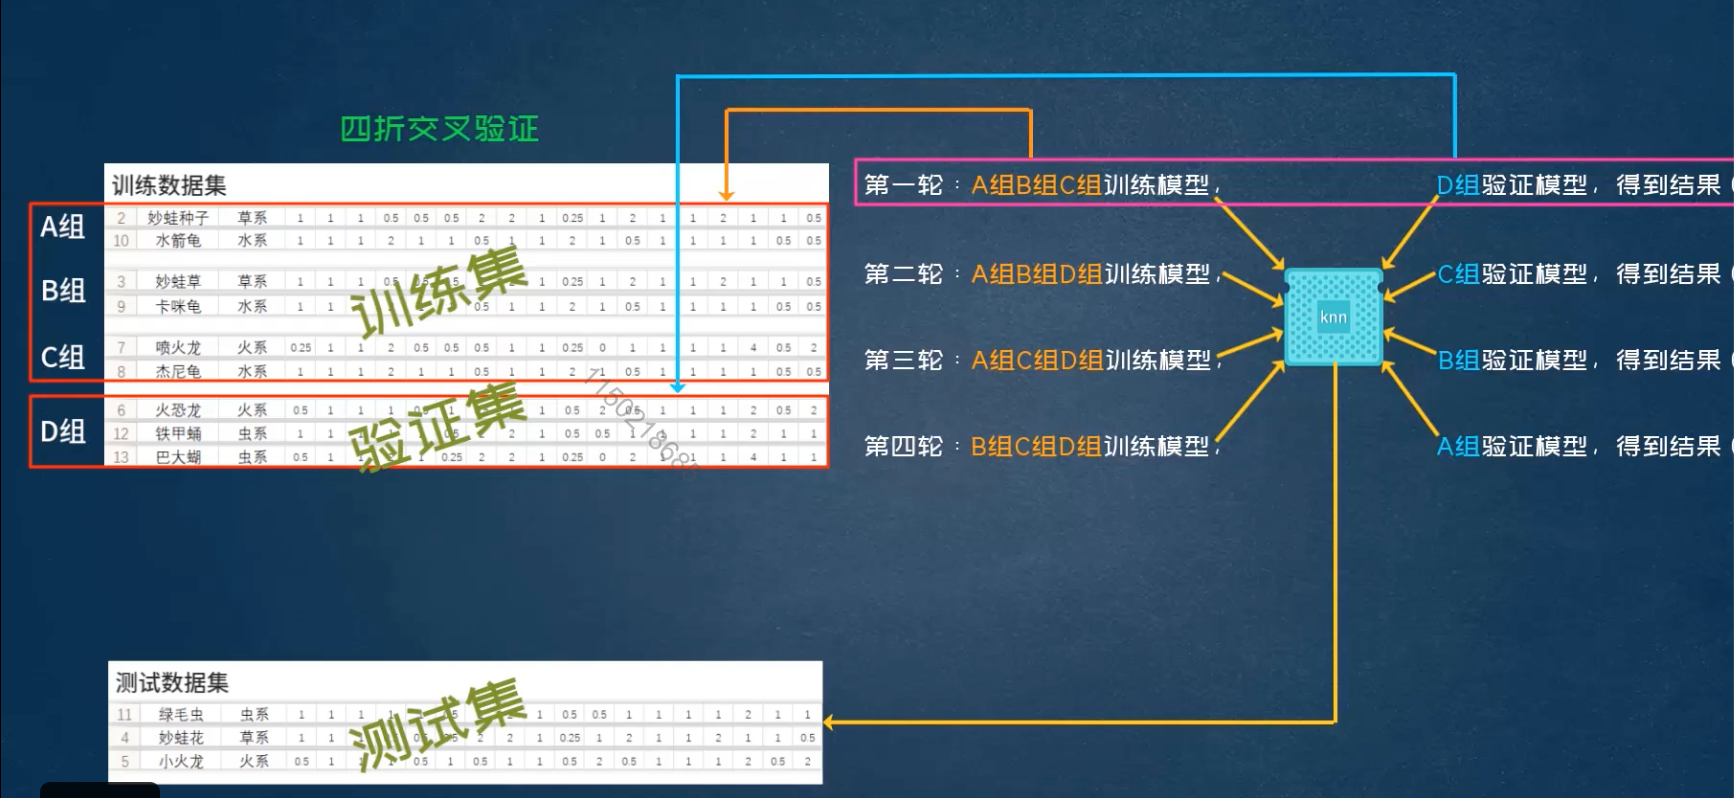

1. 创建KFold对象，指定折数n_splits
2. 设定随机：shuffle，random_state
3. 运行split方法，得到每轮的索引值

In [20]:
df.head()

,中文名称,主分类,对阵虫系,对阵恶系,对阵龙系,对阵电系,对阵妖精系,对阵格斗系,对阵火系,对阵飞行系,...,对阵钢系,对阵水系,攻击,防御,身高,生命值,特殊攻击,特殊防御,速度,体重
0,妙蛙种子,草系,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1.0,0.5,49,49,0.7,45,65,65,45,6.9
1,妙蛙草,草系,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1.0,0.5,62,63,1.0,60,80,80,60,13.0
2,妙蛙花,草系,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,1.0,0.5,100,123,2.0,80,122,120,80,100.0
3,小火龙,火系,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,0.5,2.0,52,43,0.6,39,60,50,65,8.5
4,火恐龙,火系,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,0.5,2.0,64,58,1.1,58,80,65,80,19.0


In [21]:
df2 = df.iloc[0:12,:]
df2

,中文名称,主分类,对阵虫系,对阵恶系,对阵龙系,对阵电系,对阵妖精系,对阵格斗系,对阵火系,对阵飞行系,...,对阵钢系,对阵水系,攻击,防御,身高,生命值,特殊攻击,特殊防御,速度,体重
0,妙蛙种子,草系,1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,...,1.0,0.5,49,49,0.7,45,65,65,45,6.9
1,妙蛙草,草系,1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,...,1.0,0.5,62,63,1.0,60,80,80,60,13.0
2,妙蛙花,草系,1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,...,1.0,0.5,100,123,2.0,80,122,120,80,100.0
3,小火龙,火系,0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,...,0.5,2.0,52,43,0.6,39,60,50,65,8.5
4,火恐龙,火系,0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,...,0.5,2.0,64,58,1.1,58,80,65,80,19.0
5,喷火龙,火系,0.25,1.0,1.0,2.0,0.5,0.50,0.5,1.0,...,0.5,2.0,104,78,1.7,78,159,115,100,90.5
6,杰尼龟,水系,1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,...,0.5,0.5,48,65,0.5,44,50,64,43,9.0
7,卡咪龟,水系,1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,...,0.5,0.5,63,80,1.0,59,65,80,58,22.5
8,水箭龟,水系,1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,...,0.5,0.5,103,120,1.6,79,135,115,78,85.5
9,绿毛虫,虫系,1.00,1.0,1.0,1.0,1.0,0.50,2.0,2.0,...,1.0,1.0,30,35,0.3,45,20,20,45,2.9


In [22]:
#k折分类器
from sklearn.model_selection import KFold

In [24]:
kf = KFold(n_splits=4, shuffle=True, random_state=10)

In [25]:
kf.split(df2)

<generator object _BaseKFold.split at 0x7fe6e7e6f250>

In [26]:
df_train

,中文名称,主分类,对阵虫系,对阵恶系,对阵龙系,对阵电系,对阵妖精系,对阵格斗系,对阵火系,对阵飞行系,...,对阵钢系,对阵水系,攻击,防御,身高,生命值,特殊攻击,特殊防御,速度,体重
165,咩利羊,电系,1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.5,...,0.5,1.0,40,40,0.6,55,65,45,35,7.8
234,力壮鸡,火系,0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,...,0.5,2.0,85,60,0.9,60,85,60,55,19.5
286,落雷兽,电系,1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.5,...,0.5,1.0,45,40,0.6,40,65,40,65,15.2
265,懒人翁,一般系,1.00,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,60,60,0.8,60,35,35,30,24.0
110,袋龙,一般系,1.00,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,125,100,2.2,105,60,100,100,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,玛瑙水母,水系,0.50,1.0,1.0,2.0,0.5,0.5,0.5,1.0,...,0.5,0.5,40,35,0.9,40,50,100,70,45.5
106,铁甲犀牛,地上系,1.00,1.0,1.0,0.0,1.0,2.0,0.5,0.5,...,2.0,4.0,85,95,1.0,80,30,30,25,115.0
270,咕妞妞,一般系,1.00,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,51,23,0.6,64,51,23,28,16.3
435,黑夜魔灵,幽灵系,0.50,2.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,100,135,2.2,45,65,135,45,106.6


In [27]:
df_test

,中文名称,主分类,对阵虫系,对阵恶系,对阵龙系,对阵电系,对阵妖精系,对阵格斗系,对阵火系,对阵飞行系,...,对阵钢系,对阵水系,攻击,防御,身高,生命值,特殊攻击,特殊防御,速度,体重
495,黑眼鳄,地上系,2.00,0.5,1.0,0.0,2.0,2.00,1.0,1.0,...,1.0,2.0,72,35,0.7,50,35,35,65,15.2
164,天然鸟,超能力系,1.00,2.0,1.0,2.0,1.0,0.25,1.0,1.0,...,1.0,1.0,75,70,1.5,65,95,70,95,15.0
54,哥达鸭,水系,1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,...,0.5,0.5,82,78,1.7,80,95,80,85,76.6
582,火狐狸,火系,0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,...,0.5,2.0,45,40,0.4,40,62,60,60,9.4
608,独剑鞘,钢系,0.25,2.0,0.5,1.0,0.5,0.00,2.0,0.5,...,0.5,1.0,80,100,0.8,45,35,37,28,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,火暴猴,格斗系,0.50,0.5,1.0,1.0,2.0,1.00,1.0,2.0,...,1.0,1.0,105,60,1.0,65,60,70,95,32.0
306,超音波幼虫,地上系,1.00,1.0,2.0,0.0,2.0,1.00,0.5,1.0,...,1.0,1.0,70,50,1.1,50,50,50,70,15.3
518,哥德宝宝,超能力系,2.00,2.0,1.0,1.0,1.0,0.50,1.0,1.0,...,1.0,1.0,30,50,0.4,45,55,65,45,5.8
24,皮卡丘,电系,1.00,1.0,1.0,0.5,1.0,1.00,1.0,0.5,...,0.5,1.0,55,40,0.4,35,50,50,90,6.0


In [29]:
from sklearn.metrics import accuracy_score

In [31]:
for pair in kf.split(df_train):
    train_index = pair[0]
    verify_index = pair[1]
    
    # 
    dft = df_train.iloc[train_index, :]
    dfv = df_train.iloc[verify_index,:]
    
    x = dft.iloc[:, 2:20]
    y = dft.iloc[:,1]
    
    # Train the model
    knn = KNeighborsClassifier(5)
    model = knn.fit(x,y)
    
    y_predict = model.predict(dfv.iloc[:,2:20])
    
    #
    print( accuracy_score(dfv['主分类'],y_predict))

0.8156028368794326
0.7801418439716312
0.8285714285714286
0.7928571428571428


### GridSearchCV

1. 创建机器学习算法对象(knn...)
2. 创建GridSearchCV对象
    * 指定希望评估的算法对象
    * 用字典指定超参数和范围
    * 用cv参数指定k折交叉检验
3. 调用fit方法开始搜索
4. 调用cv_results_查看搜索结果
5. best_params_直接查看最佳结果

超参数：只能人工指定或修改，训练模型无权自动调整。即超越于机器学习训练模型之上的参数。

In [32]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

gscv = GridSearchCV(knn, {'n_neighbors':range(1,10,2)}, cv=5)

In [34]:
df_train, df_test = train_test_split(df)

x = df_train.iloc[:,2:20]
y = df_train['主分类']

gscv.fit(x,y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10, 2)})

In [36]:
pd.DataFrame( gscv.cv_results_ )

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004840,0.000671,0.009312,0.001088,1,{'n_neighbors': 1},0.905660,0.877358,0.933333,0.885714,0.885714,0.897556,0.020170,1
1,0.004565,0.000428,0.008510,0.000975,3,{'n_neighbors': 3},0.877358,0.830189,0.847619,0.819048,0.828571,0.840557,0.020582,2
2,0.004778,0.000685,0.008378,0.000672,5,{'n_neighbors': 5},0.830189,0.830189,0.838095,0.838095,0.819048,0.831123,0.006997,3
3,0.004630,0.000662,0.010579,0.001477,7,{'n_neighbors': 7},0.820755,0.811321,0.838095,0.828571,0.819048,0.823558,0.009104,5
4,0.004209,0.000341,0.008014,0.000221,9,{'n_neighbors': 9},0.839623,0.820755,0.838095,0.828571,0.809524,0.827314,0.011215,4


In [37]:
gscv.best_params_

{'n_neighbors': 1}